# US Accients Exploratory Data Analysis

## About this project: <a class="anchor" id="About this project"></a>
This project aims to analyze the provided dataset to discover insights that can be visually expressed through the data. The specific objectives include:

* Clean and organize the data to ensure consistency and integrity of information.
* Conduct exploratory data analysis to identify patterns, trends, and potential anomalies.
* Validate correlations between the number of accidents and weather conditions through statistical analysis and visualization techniques.
* Graphically represent findings creatively and effectively to clearly communicate conclusions derived from data analysis.

## About the Dataset: <a class="anchor" id="Data"></a>
The dataset is a compilation of automobile accidents nationwide covering 49 states of the USA. Data were collected from February 2016 to March 2023 using multiple APIs providing real-time traffic incident data. These APIs transmit traffic data captured by various entities including US and state transportation departments, law enforcement agencies, traffic cameras, and sensors within road networks. The dataset currently comprises approximately 7.7 million accident records.


## Acknowledgement: <a class="anchor" id="Data"></a>
Acknowledgments go to the dataset creators, including Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and others, for their work in compiling and creating the dataset. Their dedication and efforts have provided a valuable source of information for research and analysis of traffic accidents nationwide in the United States.

## Loading the Data
This section entails importing the dataset from a CSV file using the Pandas library. The necessary libraries will be imported, and the first 5 rows of the dataset will be visualized.


In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [163]:
US_Accidents = pd.read_csv("US_Accidents_March23_sampled_500k.csv")
US_Accidents.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


## Data Information


This section explores the dataset US_Accidents, which contains information about various attributes related to car accidents in the US. This includes details like the accident severity, location coordinates, weather conditions, and road features such as crossings and junctions. They've inspected the dataset's columns, checked for missing values, and provided descriptive statistics to understand the numerical features' distributions and characteristics.

In [164]:
US_Accidents.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [165]:
US_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [166]:
print(US_Accidents.describe())

            Severity      Start_Lat      Start_Lng        End_Lat  \
count  500000.000000  500000.000000  500000.000000  279623.000000   
mean        2.212748      36.206421     -94.736583      36.273192   
std         0.486661       5.071411      17.405761       5.265333   
min         1.000000      24.562117    -124.497420      24.570110   
25%         2.000000      33.416823    -117.233047      33.474773   
50%         2.000000      35.832147     -87.794365      36.192669   
75%         2.000000      40.082443     -80.359601      40.181341   
max         4.000000      48.999569     -67.484130      48.998901   

             End_Lng   Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  279623.000000  500000.000000   489534.000000  370983.000000   
mean      -95.776553       0.564317       61.646254      58.229028   
std        18.120211       1.774872       19.000133      22.352246   
min      -124.497419       0.000000      -77.800000     -53.200000   
25%      -117.778324       0

## Data Cleaning

In this section the missingno library is utilized to visualize missing values in their dataset US_Accidents. After identifying columns with missing data, the percentage of missing values for each column is calculated and dropped those with more than 25% missing data. Additionally, Columns not relevant to the analysis are dropped and removed rows with any remaining missing values.

In [167]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



<Axes: >

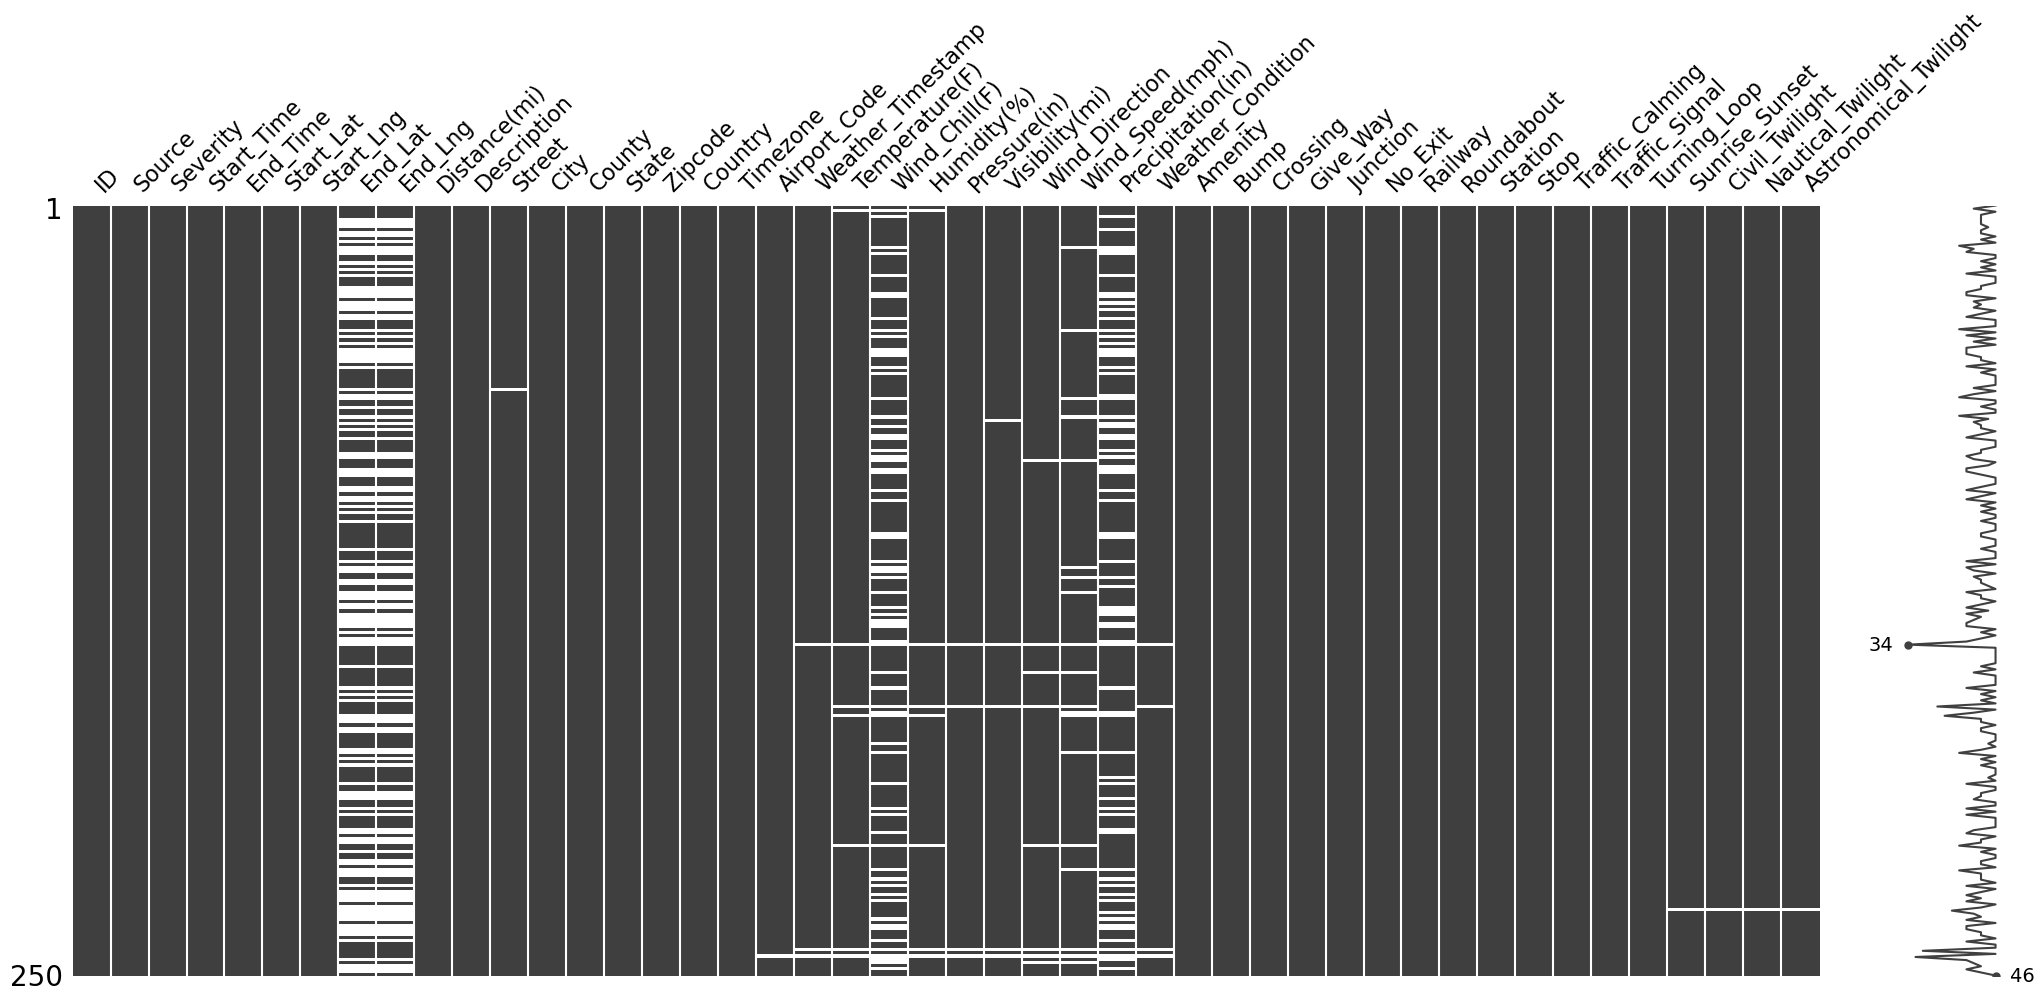

In [168]:
#Visualising Missing Values
import missingno as msno
msno.matrix(US_Accidents.sample(250))

In [169]:
# see what columns have missing data
US_Accidents.isnull().sum().sort_values(ascending=False)

End_Lat                  220377
End_Lng                  220377
Precipitation(in)        142616
Wind_Chill(F)            129017
Wind_Speed(mph)           36987
Visibility(mi)            11291
Wind_Direction            11197
Humidity(%)               11130
Weather_Condition         11101
Temperature(F)            10466
Pressure(in)               8928
Weather_Timestamp          7674
Nautical_Twilight          1483
Civil_Twilight             1483
Sunrise_Sunset             1483
Astronomical_Twilight      1483
Airport_Code               1446
Street                      691
Timezone                    507
Zipcode                     116
City                         19
Description                   1
Traffic_Signal                0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Country                       0
Turning_Loop                  0
No_Exit                       0
End_Time                      0
Start_Ti

In [170]:
# see are the missing value by Percentage
missing_percentage = US_Accidents.isnull().sum().sort_values(ascending=False)/len(US_Accidents)*100
missing_percentage

End_Lat                  44.0754
End_Lng                  44.0754
Precipitation(in)        28.5232
Wind_Chill(F)            25.8034
Wind_Speed(mph)           7.3974
Visibility(mi)            2.2582
Wind_Direction            2.2394
Humidity(%)               2.2260
Weather_Condition         2.2202
Temperature(F)            2.0932
Pressure(in)              1.7856
Weather_Timestamp         1.5348
Nautical_Twilight         0.2966
Civil_Twilight            0.2966
Sunrise_Sunset            0.2966
Astronomical_Twilight     0.2966
Airport_Code              0.2892
Street                    0.1382
Timezone                  0.1014
Zipcode                   0.0232
City                      0.0038
Description               0.0002
Traffic_Signal            0.0000
Roundabout                0.0000
Station                   0.0000
Stop                      0.0000
Traffic_Calming           0.0000
Country                   0.0000
Turning_Loop              0.0000
No_Exit                   0.0000
End_Time  

In [171]:
# Dropping columns with more than 25% missing percentage
columns_to_drop = missing_percentage[missing_percentage > 25].index
US_Accidents = US_Accidents.drop(columns=columns_to_drop)

In [172]:
#Dropping columns that are not part of the analysis
# List of columns to drop
columns_to_drop = ['ID','Source', 'Description', 'Start_Lat', 'Start_Lng', 'County', 'Zipcode', 'Timezone', 'Airport_Code',
                   'Wind_Direction', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
# Drop the columns
US_Accidents = US_Accidents.drop(columns=columns_to_drop)

# Drop rows with null values in any column
US_Accidents = US_Accidents.dropna()

print(US_Accidents.head())

   Severity                     Start_Time                       End_Time  \
0         2            2019-06-12 10:10:56            2019-06-12 10:55:58   
1         2  2022-12-03 23:37:14.000000000  2022-12-04 01:56:53.000000000   
2         2  2022-08-20 13:13:00.000000000  2022-08-20 15:22:45.000000000   
3         2            2022-02-21 17:43:04            2022-02-21 19:43:23   
4         2            2020-12-04 01:46:00            2020-12-04 04:13:09   

   Distance(mi)            Street         City State Country  \
0         0.000        Highway 19      Zachary    LA      US   
1         0.056   Forest Ridge Dr     Sterling    VA      US   
2         0.022     Floradale Ave       Lompoc    CA      US   
3         1.054        14th St NW       Austin    MN      US   
4         0.046        River Blvd  Bakersfield    CA      US   

     Weather_Timestamp  Temperature(F)  ...  Junction  No_Exit  Railway  \
0  2019-06-12 09:53:00            77.0  ...     False    False    False   
1 

## Exploratory Analysis and Visualization¶

In this section, various perspectives are explored. Data analysis includes location-based examination, date-related insights, study of atmospheric factors' impact, and analysis based on traffic characteristics.

### Analysis By Location

This section initially examines the cities and states with the highest accident rates. Following that, a detailed analysis is conducted on the top three states with the most accidents. The primary cities are identified, along with their percentage relative to the rest of the state.

In [356]:
# Get the top 20 cities with the most accidents
accidents_by_city = US_Accidents['City'].value_counts()

top_20_cities = accidents_by_city.head(20)
print("Top 20 Cities with the Most Accidents:")
print(top_20_cities)

Top 20 Cities with the Most Accidents:
City
Miami            11711
Houston          10154
Los Angeles       8674
Charlotte         8291
Dallas            7942
Orlando           6759
Austin            5445
Raleigh           5211
Nashville         4513
Baton Rouge       4404
Sacramento        4127
Atlanta           4049
San Diego         3375
Minneapolis       3314
Phoenix           3187
Oklahoma City     2852
Richmond          2780
Jacksonville      2571
Tucson            2467
Columbia          2306
Name: count, dtype: int64


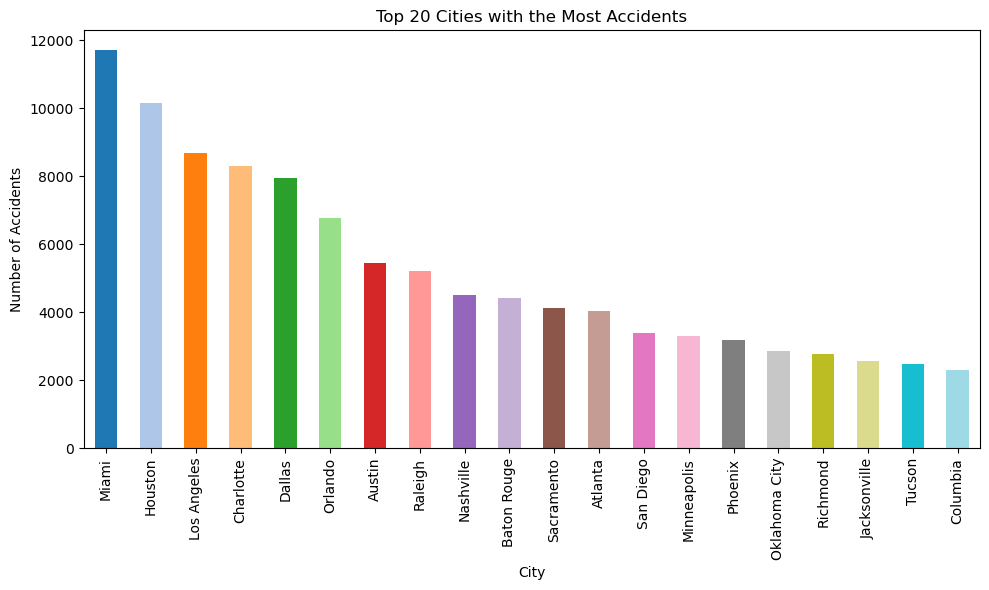

In [174]:
# Create the bar plot
plt.figure(figsize=(10, 6))
color_range = range(50)
top_20_cities.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()


In [175]:
# Get the top 20 Stateswith the most accidents
accidents_by_state = US_Accidents['State'].value_counts()

top_20_states = accidents_by_state.head(20)
print("Top 20 States with the Most Accidents:")
print(top_20_states)

Top 20 States with the Most Accidents:
State
CA    101367
FL     53407
TX     34375
SC     22560
NY     21202
NC     19866
PA     17568
VA     17198
MN     11691
OR     10550
IL     10469
TN     10292
AZ     10032
MI     10022
GA      9868
LA      9169
NJ      7962
OH      7171
MD      6723
WA      6277
Name: count, dtype: int64


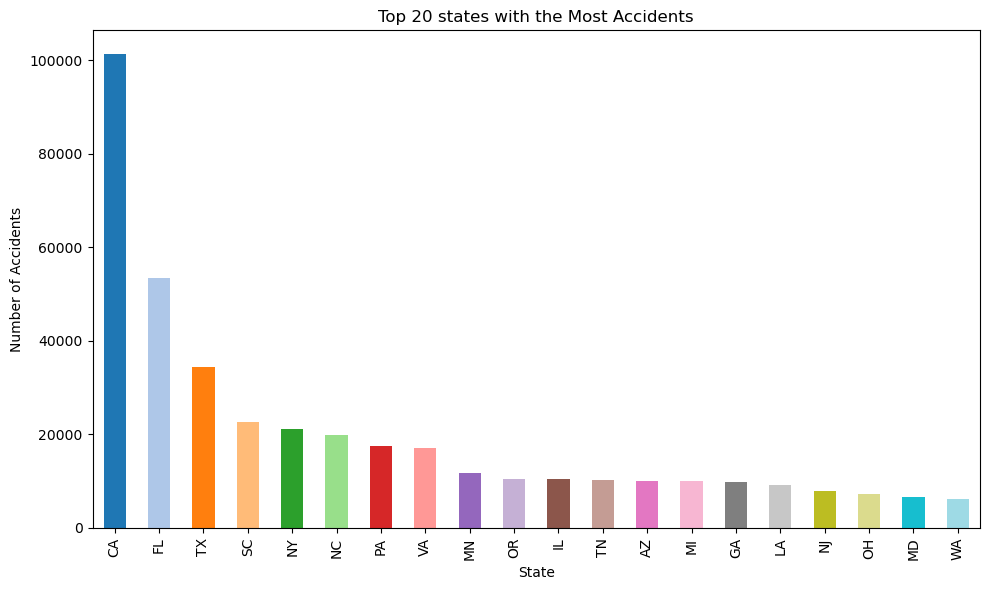

In [176]:
# Create the bar plot
plt.figure(figsize=(10, 6))
top_20_states.plot(kind='bar',color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 states with the Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()

In [177]:
#Filtering the Accidents in California By City
accidents_california = US_Accidents[US_Accidents['State'] == 'CA']

#Filtering the top 5 cities in California with most Accidents
accidents_by_city_california = accidents_california['City'].value_counts().head(5)


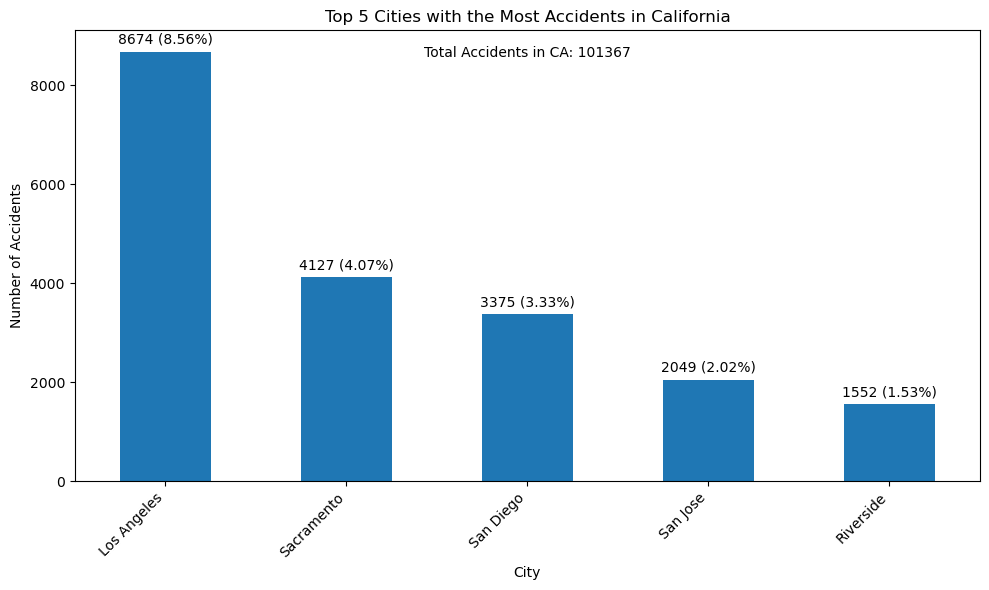

In [178]:
# Calculate the total percentage of accidents in California
total_accidents_california = len(accidents_california)
percentage_california = total_accidents_california / len(US_Accidents) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
accidents_by_city_california.plot(kind='bar', color='#1F77B4')



# Set the title and axis labels
plt.title('Top 5 Cities with the Most Accidents in California')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Add the count and percentage to the label above each bar
for x, y in enumerate(accidents_by_city_california):
    plt.text(x, y + 100, f'{y} ({(y / total_accidents_california * 100):.2f}%)',
             ha='center', va='bottom')
    # Add the total percentage to the label
plt.text(0.5, 0.95, f'Total Accidents in CA: {total_accidents_california}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the bar plot
plt.tight_layout()
plt.show()

In [179]:
#Filtering the Accidents in Florida By City
accidents_florida = US_Accidents[US_Accidents['State'] == 'FL']

#Filtering the top 5 cities in California with most Accidents
accidents_by_city_florida = accidents_florida['City'].value_counts().head(5)

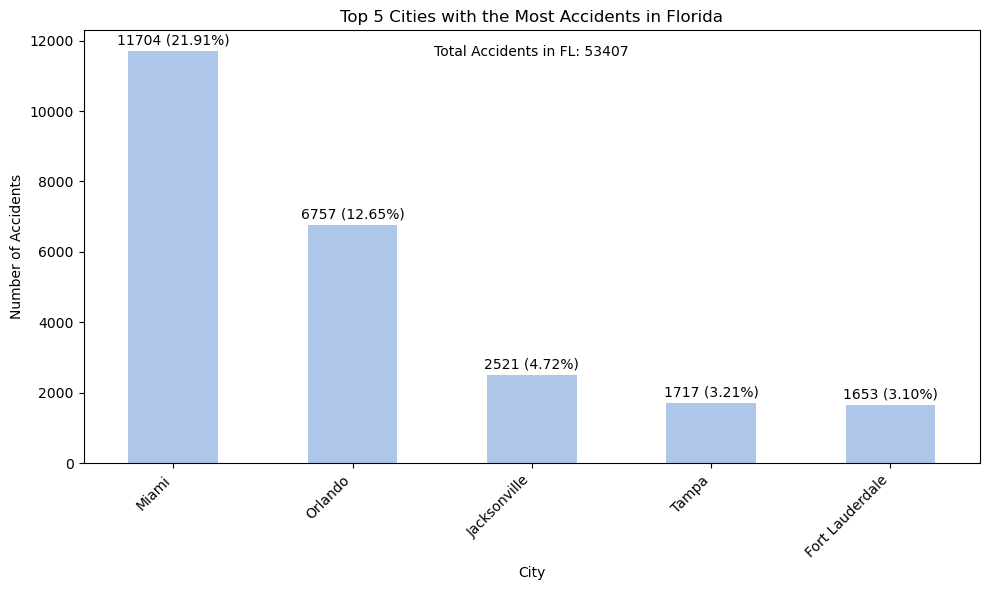

In [180]:
# Calculate the total percentage of accidents in florida
total_accidents_florida = len(accidents_florida)
percentage_florida = total_accidents_florida / len(US_Accidents) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
accidents_by_city_florida.plot(kind='bar', color='#AEC7E8')



# Set the title and axis labels
plt.title('Top 5 Cities with the Most Accidents in Florida')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Add the count and percentage to the label above each bar
for x, y in enumerate(accidents_by_city_florida):
    plt.text(x, y + 100, f'{y} ({(y / total_accidents_florida * 100):.2f}%)',
             ha='center', va='bottom')
    # Add the total percentage to the label
plt.text(0.5, 0.95, f'Total Accidents in FL: {total_accidents_florida}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the bar plot
plt.tight_layout()
plt.show()

In [181]:
#Filtering the Accidents in Texas By City
accidents_texas = US_Accidents[US_Accidents['State'] == 'TX']

#Filtering the top 5 cities in Texas with most Accidents
accidents_by_city_texas = accidents_texas['City'].value_counts().head(5)

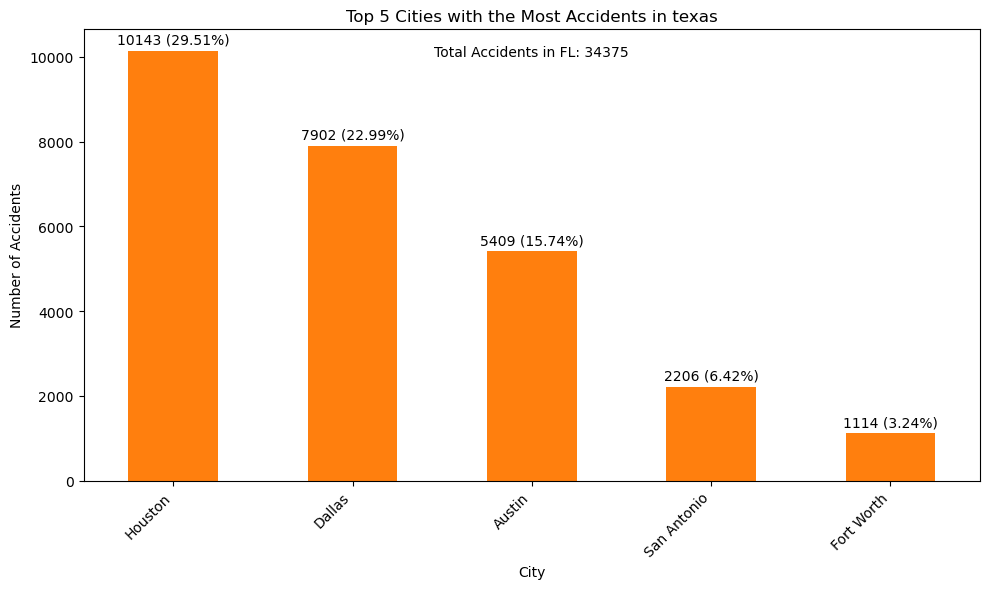

In [182]:
# Calculate the total percentage of accidents in texas
total_accidents_texas = len(accidents_texas)
percentage_texas= total_accidents_texas / len(US_Accidents) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
accidents_by_city_texas.plot(kind='bar', color='#FF7F0E')



# Set the title and axis labels
plt.title('Top 5 Cities with the Most Accidents in texas')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Add the count and percentage to the label above each bar
for x, y in enumerate(accidents_by_city_texas):
    plt.text(x, y + 100, f'{y} ({(y / total_accidents_texas * 100):.2f}%)',
             ha='center', va='bottom')
    # Add the total percentage to the label
plt.text(0.5, 0.95, f'Total Accidents in FL: {total_accidents_texas}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the bar plot
plt.tight_layout()
plt.show()

### Analysis by Date

In this section, the data is disaggregated based on the 'Start_Time' column, examining the frequency and percentage of accidents by year, day of the week, and time. Additionally, the analysis distinguishes between weekdays and weekends due to their distinct patterns of behavior

In [183]:
#hanging the Time Format
US_Accidents['Start_Time'][0]

'2019-06-12 10:10:56'

In [224]:
# Convert the 'Start_Time' column to datetime object
US_Accidents.Start_Time = pd.to_datetime(US_Accidents.Start_Time, errors='coerce')

year = US_Accidents['Start_Time'].dt.year
month = US_Accidents['Start_Time'].dt.month
dayofweek = US_Accidents['Start_Time'].dt.dayofweek
hour = US_Accidents['Start_Time'].dt.hour
weekday_hour = US_Accidents[US_Accidents['Start_Time'].dt.dayofweek < 5]['Start_Time'].dt.hour
weekend_hour = US_Accidents[US_Accidents['Start_Time'].dt.dayofweek >= 5]['Start_Time'].dt.hour


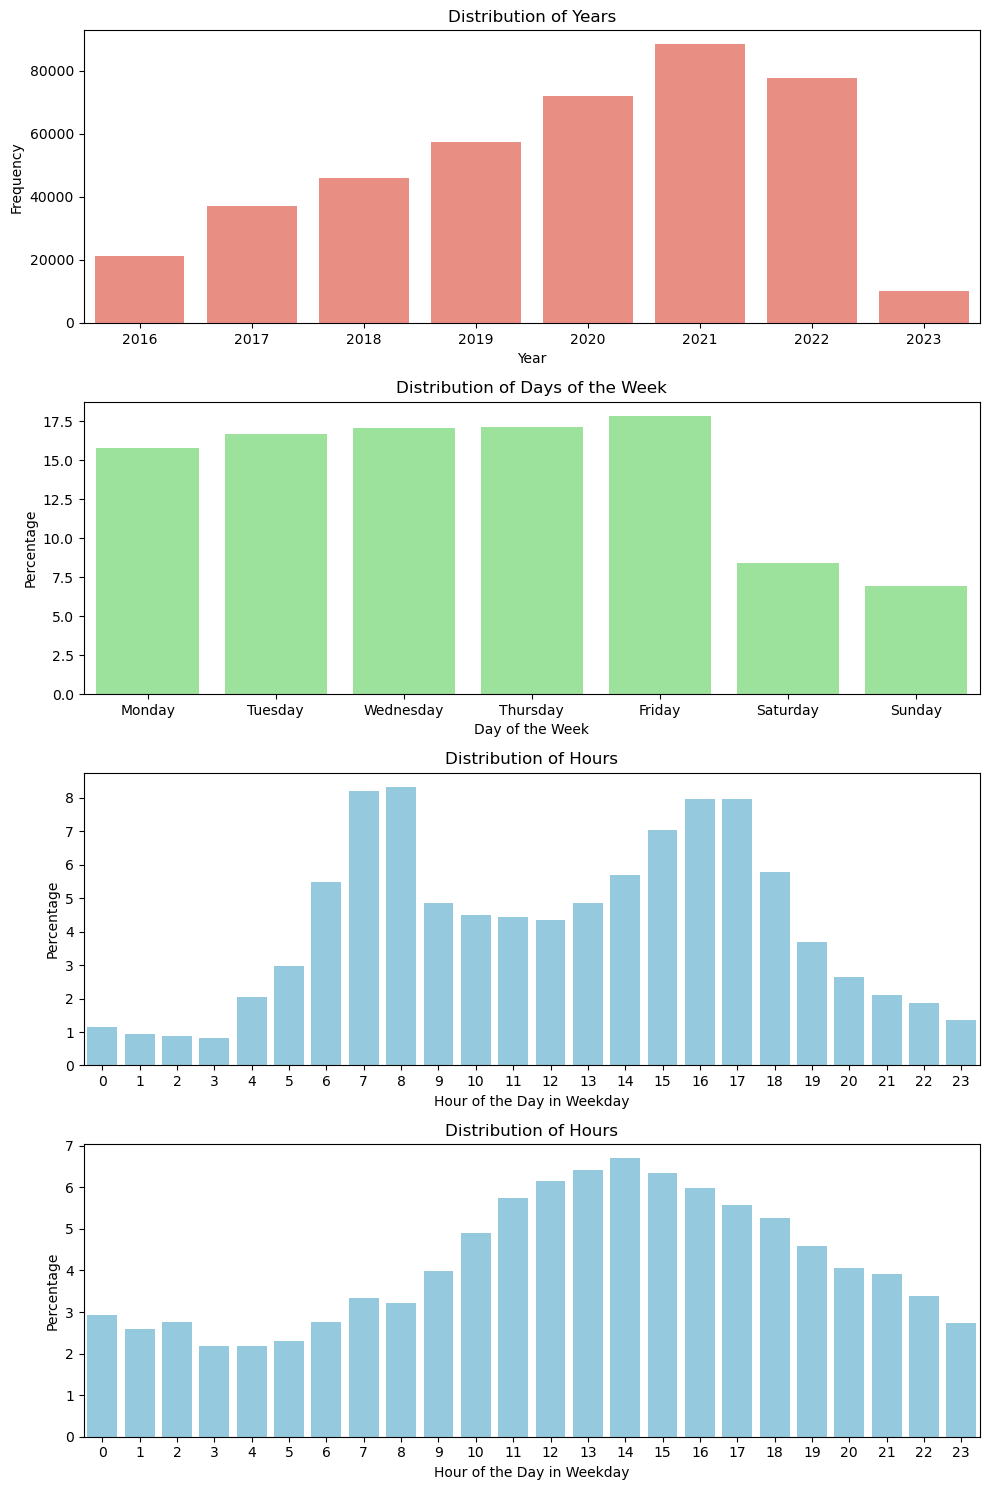

In [225]:
# Create histograms for hours, years, and days of the week
fig, axes = plt.subplots(4, 1, figsize=(10, 15))

# Histogram for years
year_frequency = (year.value_counts()).sort_index()
sns.barplot(x=year_frequency.index.astype(int), y=year_frequency.values, ax=axes[0], color='salmon')
axes[0].set_title('Distribution of Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')

# Histogram for days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_percentage = (dayofweek.value_counts(normalize=True) * 100).sort_index()
sns.barplot(x=day_percentage.index, y=day_percentage.values, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Days of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Percentage')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(days)


# Histogram for Hours in Weekdays
hour_percentage = (weekday_hour.value_counts(normalize=True) * 100).sort_index()
sns.barplot(x=hour_percentage.index.astype(int), y=hour_percentage.values, ax=axes[2], color='skyblue')
axes[2].set_title('Distribution of Hours')
axes[2].set_xlabel('Hour of the Day in Weekday')
axes[2].set_ylabel('Percentage')

# Histogram for Hours in Weekends
hour_percentage = (weekend_hour.value_counts(normalize=True) * 100).sort_index()
sns.barplot(x=hour_percentage.index.astype(int), y=hour_percentage.values, ax=axes[3], color='skyblue')
axes[3].set_title('Distribution of Hours')
axes[3].set_xlabel('Hour of the Day in Weekend')
axes[3].set_ylabel('Percentage')
plt.tight_layout()
plt.show()


### Analysis by Weather

This chapter aims to discern the impact of weather conditions on accident occurrences by examining factors such as temperature, humidity, and wind speed. These factors are juxtaposed with annual average values to highlight deviations from the norm. The analysis focuses on the top three states with the highest accident rates. Finally, a bar graph is presented to visualize the distribution of climate conditions.

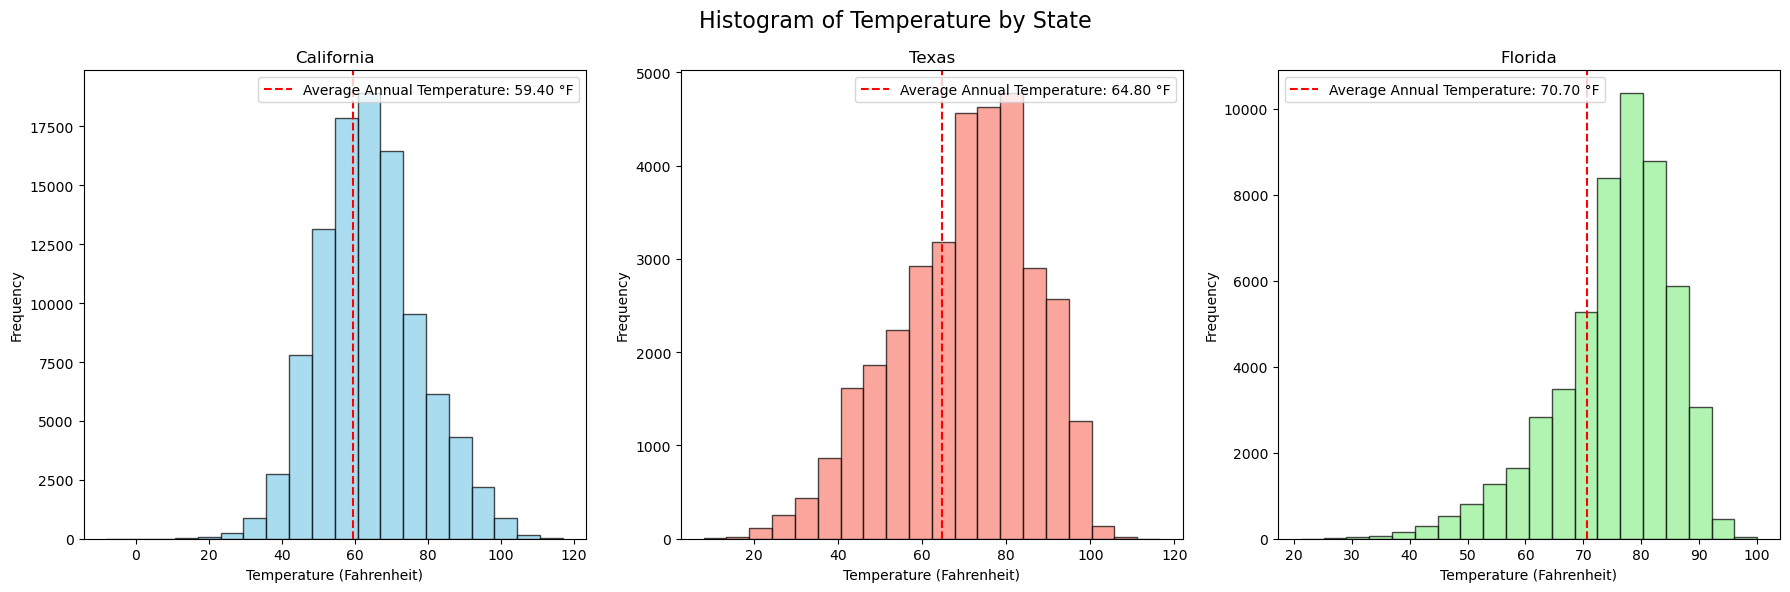

In [285]:
# Filter data for California, Texas, and Florida
california_data = US_Accidents[US_Accidents['State'] == 'CA']['Temperature(F)'].dropna()
texas_data = US_Accidents[US_Accidents['State'] == 'TX']['Temperature(F)'].dropna()
florida_data = US_Accidents[US_Accidents['State'] == 'FL']['Temperature(F)'].dropna()

# Calculate mean temperatures for each state
california_mean_temp = 59.4
texas_mean_temp = 64.8
florida_mean_temp = 70.7

# Create subplots for each state
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# California
axes[0].hist(california_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(california_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {california_mean_temp:.2f} °F')
axes[0].set_title('California')
axes[0].set_xlabel('Temperature (Fahrenheit)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Texas
axes[1].hist(texas_data, bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1].axvline(texas_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {texas_mean_temp:.2f} °F')
axes[1].set_title('Texas')
axes[1].set_xlabel('Temperature (Fahrenheit)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Florida
axes[2].hist(florida_data, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].axvline(florida_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {florida_mean_temp:.2f} °F')
axes[2].set_title('Florida')
axes[2].set_xlabel('Temperature (Fahrenheit)')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.suptitle('Histogram of Temperature by State', fontsize=16)
plt.tight_layout()
plt.show()

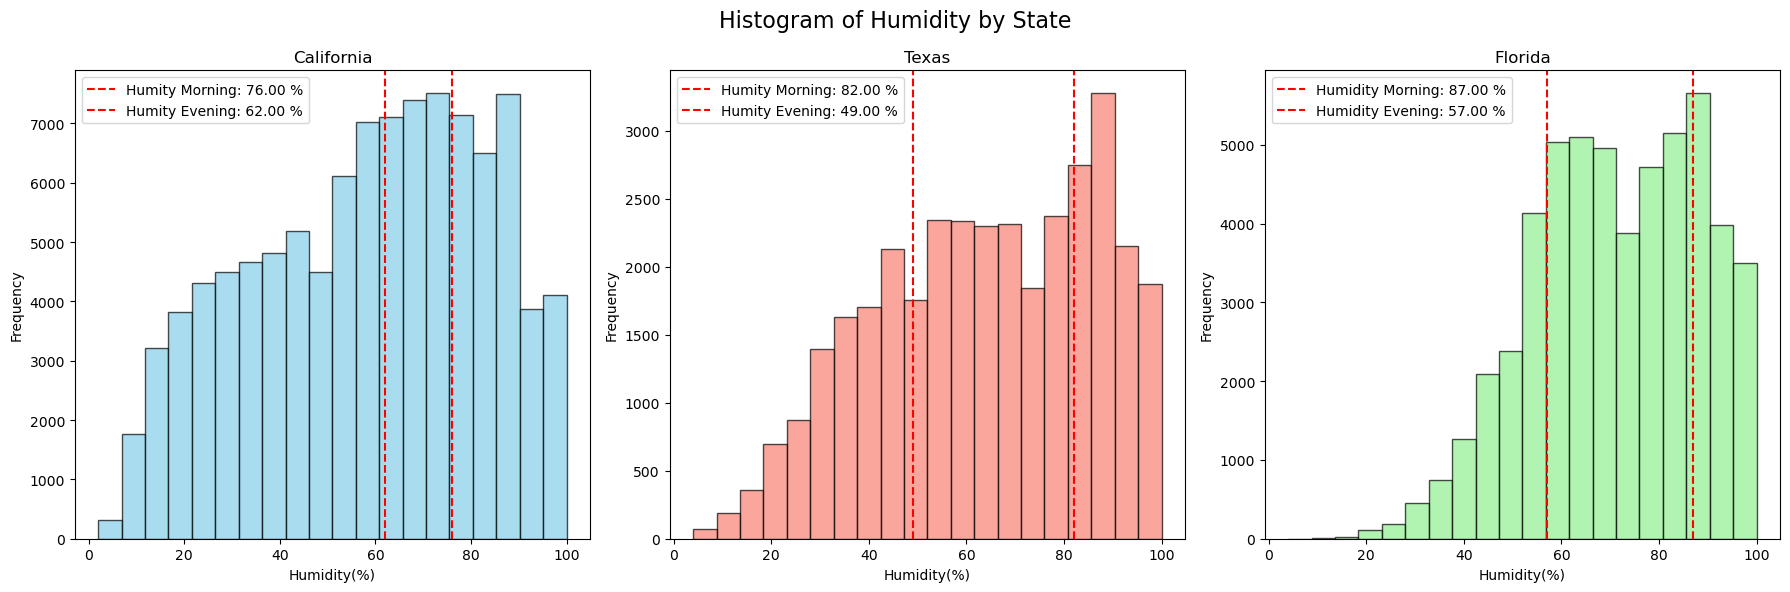

In [292]:
# Filter data for California, Texas, and Florida
california_data = US_Accidents[US_Accidents['State'] == 'CA']['Humidity(%)'].dropna()
texas_data = US_Accidents[US_Accidents['State'] == 'TX']['Humidity(%)'].dropna()
florida_data = US_Accidents[US_Accidents['State'] == 'FL']['Humidity(%)'].dropna()

# Calculate mean temperatures for each state
california_mean_humity_morning = 76
california_mean_humity_night = 62
texas_mean_humity_morning = 82
texas_mean_humity_night = 49
florida_mean_humity_morning = 87
florida_mean_humity_night = 57

# Create subplots for each state
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# California
axes[0].hist(california_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(california_mean_humity_morning, color='red', linestyle='--', linewidth=1.5, label=f'Humity Morning: {california_mean_humity_morning:.2f} %')
axes[0].axvline(california_mean_humity_night, color='red', linestyle='--', linewidth=1.5, label=f'Humity Evening: {california_mean_humity_night:.2f} %')
axes[0].set_title('California')
axes[0].set_xlabel('Humidity(%)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Texas
axes[1].hist(texas_data, bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1].axvline(texas_mean_humity_morning, color='red', linestyle='--', linewidth=1.5, label=f'Humity Morning: {texas_mean_humity_morning:.2f} %')
axes[1].axvline(texas_mean_humity_night, color='red', linestyle='--', linewidth=1.5, label=f'Humity Evening: {texas_mean_humity_night:.2f} %')
axes[1].set_title('Texas')
axes[1].set_xlabel('Humidity(%)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Florida
axes[2].hist(florida_data, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].axvline(florida_mean_humity_morning, color='red', linestyle='--', linewidth=1.5, label=f'Humidity Morning: {florida_mean_humity_morning:.2f} %')
axes[2].axvline(florida_mean_humity_night, color='red', linestyle='--', linewidth=1.5, label=f'Humidity Evening: {florida_mean_humity_night:.2f} %')
axes[2].set_title('Florida')
axes[2].set_xlabel('Humidity(%)')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.suptitle('Histogram of Humidity by State', fontsize=16)
plt.tight_layout()
plt.show()

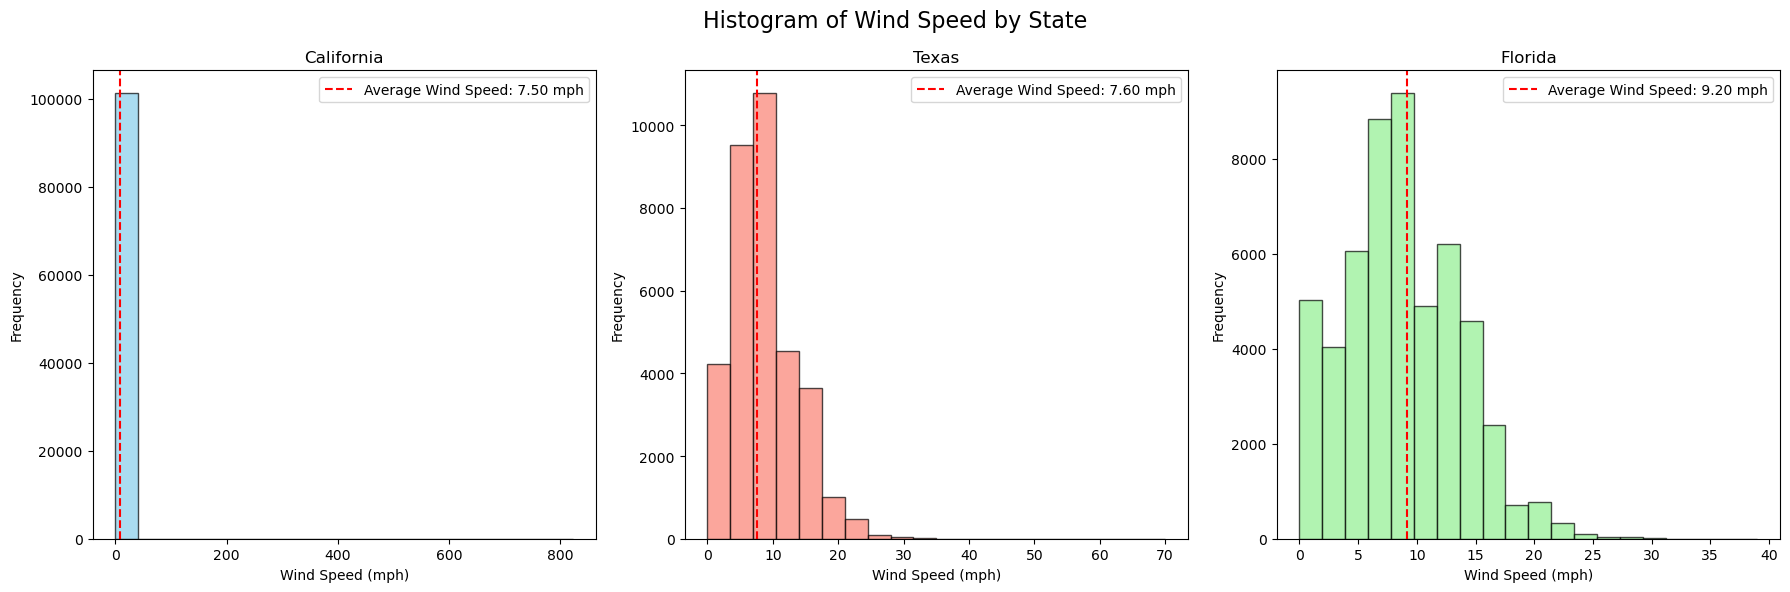

In [298]:
# Filter data for California, Texas, and Florida
california_data = US_Accidents[US_Accidents['State'] == 'CA']['Wind_Speed(mph)'].dropna()
texas_data = US_Accidents[US_Accidents['State'] == 'TX']['Wind_Speed(mph)'].dropna()
florida_data = US_Accidents[US_Accidents['State'] == 'FL']['Wind_Speed(mph)'].dropna()

# Calculate mean temperatures for each state
california_mean_wind = 7.5
texas_mean_wind = 7.6
florida_mean_wind = 9.2

# Create subplots for each state
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# California
axes[0].hist(california_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(california_mean_wind, color='red', linestyle='--', linewidth=1.5, label=f'Average Wind Speed: {california_mean_wind:.2f} mph')
axes[0].set_title('California')
axes[0].set_xlabel('Wind Speed (mph)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Texas
axes[1].hist(texas_data, bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1].axvline(texas_mean_wind, color='red', linestyle='--', linewidth=1.5, label=f'Average Wind Speed: {texas_mean_wind:.2f} mph')
axes[1].set_title('Texas')
axes[1].set_xlabel('Wind Speed (mph)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Florida
axes[2].hist(florida_data, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].axvline(florida_mean_wind, color='red', linestyle='--', linewidth=1.5, label=f'Average Wind Speed: {florida_mean_wind:.2f} mph')
axes[2].set_title('Florida')
axes[2].set_xlabel('Wind Speed (mph)')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.suptitle('Histogram of Wind Speed by State', fontsize=16)
plt.tight_layout()
plt.show()

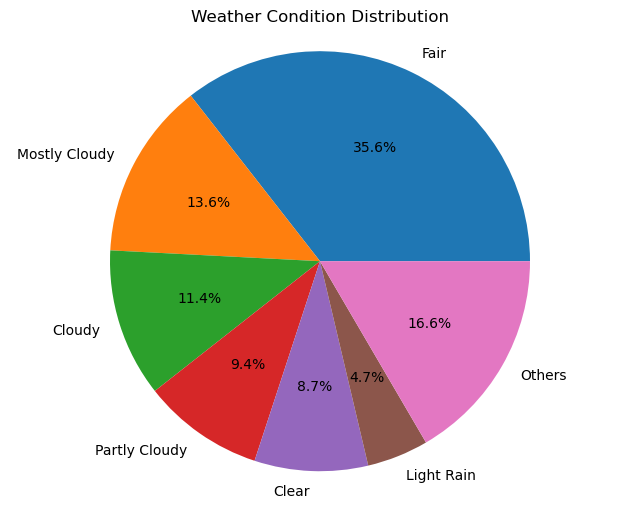

In [317]:
# Graph the Weather conditions in a Pie Chart
weather_counts = US_Accidents['Weather_Condition'].value_counts()

# Group the main categories of weather conditions
top_conditions = weather_counts.head(6)
other_conditions_count = weather_counts.iloc[6:].sum()

# Create a new DataFrame with the summarized weather conditions
summary_weather_counts = pd.DataFrame(top_conditions).reset_index()
summary_weather_counts.columns = ['Weather_Condition', 'Count']

others_row = pd.DataFrame({'Weather_Condition': ['Others'], 'Count': [other_conditions_count]})
summary_weather_counts = pd.concat([summary_weather_counts, others_row], ignore_index=True)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(summary_weather_counts['Count'], labels=summary_weather_counts['Weather_Condition'], autopct='%1.1f%%')
plt.title('Weather Condition Distribution')
plt.axis('equal')
plt.show()

### Analysis by Traffic nature 

This section aims to uncover patterns based on traffic characteristics, such as identifying situations where accidents are more prevalent, such as at traffic signals, crossings, junctions, and stops. The analysis then delves into the specificities of the three previously studied states (California, Texas, and Florida) to discern any differences.

In [320]:
#Convert Booleans Columns into binary 
# List of boolean columns
boolean_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
                   'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                   'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

US_Accidents[boolean_columns] = US_Accidents[boolean_columns].astype(int)



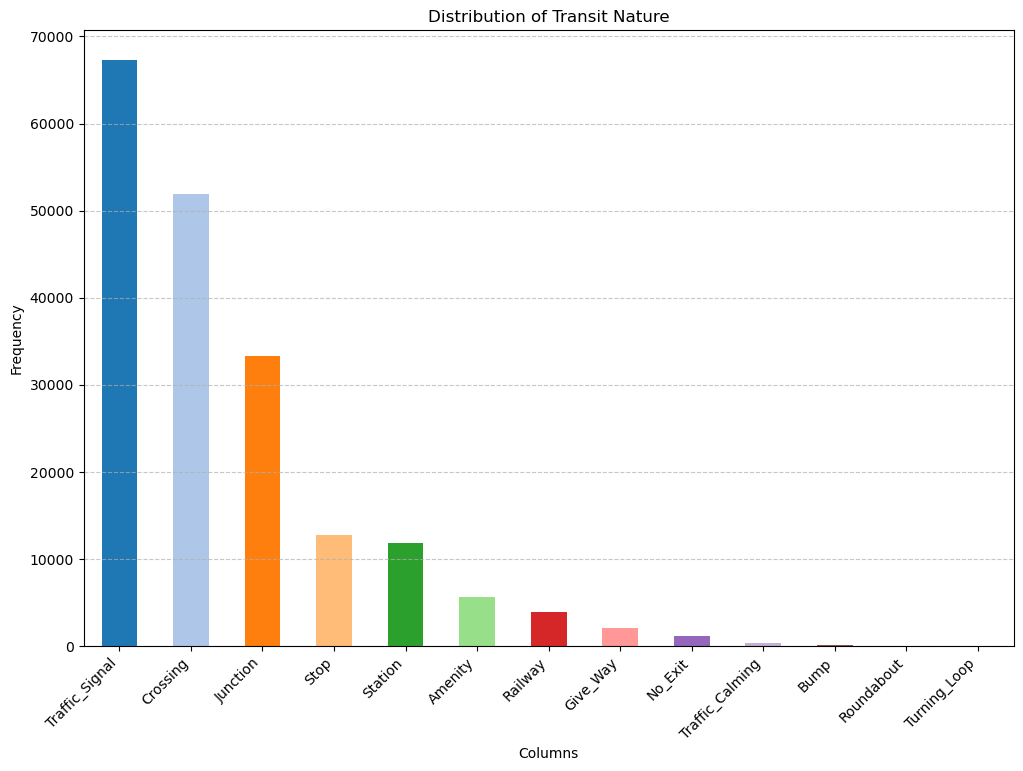

In [327]:
# Plot histograms for traffic conditions
plt.figure(figsize=(12, 8))
US_Accidents[boolean_columns].sum().sort_values(ascending=False).plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))
plt.title('Distribution of traffic Conditions')
plt.xlabel('Columns')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

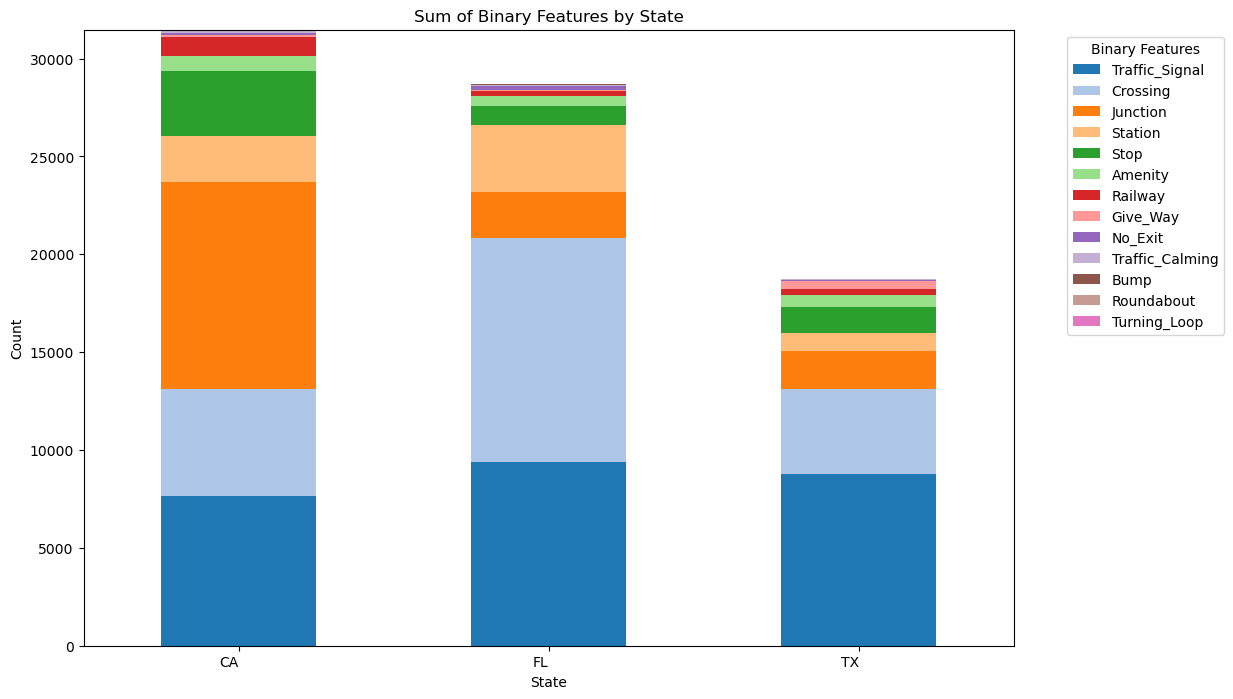

In [355]:
#Identifying the most common traffic conditions in the states with the highest accident rates

#Filter data for the top 3 states with the most accidents
top_states = US_Accidents['State'].value_counts().head(3).index
top_states_data = US_Accidents[US_Accidents['State'].isin(top_states)]

#Calculate sum of each traffic condition for the top states
binary_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
                  'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                  'Traffic_Signal', 'Turning_Loop']

binary_sums = {}
for column in binary_columns:
    binary_sums[column] = top_states_data.groupby('State')[column].sum()

# Calculate total sum of each traffic condition across all states
total_sums = pd.Series({col: sums.sum() for col, sums in binary_sums.items()})

# Sort traffic condition by total sum in descending order
sorted_binary_features = total_sums.sort_values(ascending=False)

# Get a color palette 'tab20' with the number of colors equal to the number of binary features
color_palette = plt.get_cmap('tab20')(range(len(sorted_binary_features)))

# Create a dictionary to store the color assignment for each feature
color_mapping = {}

# Assign a color to each feature
for i, feature in enumerate(sorted_binary_features.index):
    color_mapping[feature] = color_palette[i]

#Plot stacked bar plot with each traffic condition having a different color
plt.figure(figsize=(12, 8))
bottom = pd.Series(0, index=top_states)
for column in sorted_binary_features.index:
    sums = binary_sums[column]
    sums.plot(kind='bar', stacked=True, figsize=(12, 8), label=column, bottom=bottom, color=color_mapping[column])
    bottom = bottom.add(sums, fill_value=0)

plt.title('Sum of Binary Features by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Binary Features',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0, ha='right')
plt.show()


## Summary and Insights

1. The End_Lat and End_Lng data fields have 44% missing values, rendering them unsuitable for analysis. Similarly, precipitation and wind chill data have approximately 15% missing values.

2. The five cities with the highest number of accidents in the dataset, each recording over 8,000 accidents, are Miami, Houston, Los Angeles, Charlotte, and Dallas.

3. The states with the highest number of accidents are California, Texas, and Florida. In California, the city with the most accidents (Los Angeles) represents a modest 9% of the total accidents in the state, whereas in Texas, the city with the most accidents (Houston) accounts for a substantial 30% of the state's total accidents. In Florida, the city with the most accidents (Miami) represents 22% of the total accidents in the state.

4. The occurrence of accidents decreases significantly in 2023, likely due to data availability only until March 2023.

5. Two distinct patterns are observed between weekdays and weekends. Weekdays account for approximately 85% of total accidents, while weekends only contribute around 15%.

6. Peak accident times during weekdays coincide with high traffic flow, with the first peak occurring at 8:00 and the second at 17:00. On weekends, the peak occurs at 14:00, indicating sustained activity throughout the afternoon, as mornings witness significantly fewer accidents.

7. Analysis of meteorological conditions reveals that the majority of accidents occur under average weather conditions, suggesting no significant influence or deviation from typical weather patterns. Approximately 35.6% of accidents occur under fair weather conditions.

8. Regarding traffic conditions, the majority of accidents involve traffic signals, crossings, or junctions.

9. Discriminating by the three states with the highest accident rates, it is observed that in California, most accidents occur at traffic signals and junctions. In Florida, traffic signals and crossings are more involved than junctions. In Texas, traffic signals predominate, followed by crossings and junctions in lesser proportions.